In [76]:
import torch
import glob

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Evaluation of DP Models with varying Clipping Norms

This script can be used to analyze and plot the metrics and losses gather during the training of the DP models with varying clipping norms

In [77]:
figures_path = 'figures/clip/'

clip_norms = {1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

width = 6.5  # in inches
height = width * 0.75  # 4:3 aspect ratio
fig_size = (width, height)


In [78]:
metrics_files = glob.glob('../metrics/clip/16-07/metrics_dp_clipnorm_*_epoch*.pt')
losses_files = glob.glob('../losses/clip/16-07/losses_dp_clipnorm_*_epoch300.pt')

In [79]:
metrics = {}
for norm in clip_norms:
    for epoch in range(50, 301, 10):
        metrics_file = f'../metrics/clip/16-07/metrics_dp_clipnorm_{norm}_epoch{epoch}.pt'
        metric = torch.load(metrics_file, weights_only=False)
        if norm not in metrics:
            metrics[norm] = {}
        metrics[norm][epoch] = metric

metrics[1.0]

{50: {'epoch': 50,
  'epsilon': 0.44880944325269984,
  'delta': 1e-05,
  'mse': 13.975862503051758,
  'mae': 3.2169394493103027,
  'rmse': 3.738430486588156},
 60: {'epoch': 60,
  'epsilon': 0.494352859958936,
  'delta': 1e-05,
  'mse': 13.488402366638184,
  'mae': 3.1233558654785156,
  'rmse': 3.672656037071561},
 70: {'epoch': 70,
  'epsilon': 0.5365667971093716,
  'delta': 1e-05,
  'mse': 12.867725372314453,
  'mae': 2.997399091720581,
  'rmse': 3.5871611857169805},
 80: {'epoch': 80,
  'epsilon': 0.5761307399235702,
  'delta': 1e-05,
  'mse': 12.063518524169922,
  'mae': 2.8434059619903564,
  'rmse': 3.4732576242153304},
 90: {'epoch': 90,
  'epsilon': 0.6135183063856728,
  'delta': 1e-05,
  'mse': 11.033931732177734,
  'mae': 2.663757801055908,
  'rmse': 3.321736252651275},
 100: {'epoch': 100,
  'epsilon': 0.6490757893375819,
  'delta': 1e-05,
  'mse': 9.905498504638672,
  'mae': 2.4668214321136475,
  'rmse': 3.147300192965182},
 110: {'epoch': 110,
  'epsilon': 0.68306730994821,

In [80]:
def plot_metrics(metrics):
    for norm, data in metrics.items():
        epochs = sorted(data.keys())
        mse = [data[epoch]['mse'] for epoch in epochs]
        mae = [data[epoch]['mae'] for epoch in epochs]
        
        plt.figure(figsize=fig_size)
        plt.plot(epochs, mse, label='MSE', color='blue')
        plt.plot(epochs, mae, label='MAE', color='orange')
        plt.title(f'Metrics for Clip Norm {norm}')
        plt.xlabel('Epochs')
        plt.ylabel('Metric Value')
        plt.legend()
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(f'{figures_path}metrics_clipnorm_{norm}.pdf')
        plt.close()
        
plot_metrics(metrics)

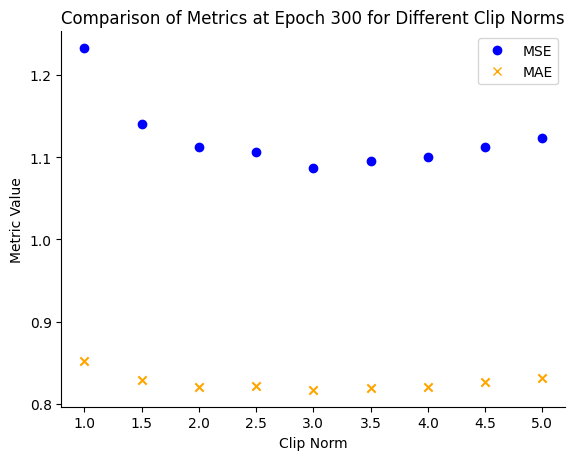

In [81]:

def plot_comparison(metrics):
    # Plot comparison of MSE, MAE, and Epsilon for different clip norms at the last epoch = 300
    epochs = [300]
    plt.figure(figsize=fig_size)
    for norm in clip_norms:
        if norm in metrics and 300 in metrics[norm]:
            mse = metrics[norm][300]['mse']
            mae = metrics[norm][300]['mae']
            plt.scatter(norm, mse, label=f'MSE {norm}', color='blue', marker='o')
            plt.scatter(norm, mae, label=f'MAE {norm}', color='orange', marker='x')
    plt.title('Comparison of Metrics at Epoch 300 for Different Clip Norms')
    plt.xlabel('Clip Norm')
    plt.ylabel('Metric Value')
    plt.xticks(list(clip_norms))
    # Custom legend for symbol meanings only
    custom_lines = [
        Line2D([0], [0], color='blue', marker='o', linestyle='None', label='MSE'),
        Line2D([0], [0], color='orange', marker='x', linestyle='None', label='MAE'),
    ]
    plt.legend(handles=custom_lines)
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{figures_path}comparison_metrics_clipnorms.pdf')

plot_comparison(metrics)


In [82]:
losses = {}
for norm in clip_norms:
    losses_file = f'../losses/clip/16-07/losses_dp_clipnorm_{norm}_epoch300.pt'
    loss = torch.load(losses_file, weights_only=False)
    losses[norm] = loss

In [83]:
# Find out which clip norm has the lowest validation loss at epoch 300
min_val_loss = float('inf')
best_norm = None
for norm, loss in losses.items():
    val_loss = loss['val_loss'][-1]  # Last value in the validation loss
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        best_norm = norm

print(f'Best clip norm based on validation loss at epoch 300: {best_norm} with loss {min_val_loss:.4f}')

Best clip norm based on validation loss at epoch 300: 3.0 with loss 1.0903


In [84]:
for norm in clip_norms:
    print(f'Clip norm {norm} metrics: {metrics[norm][300]}')

Clip norm 1.0 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.2323486804962158, 'mae': 0.8520717024803162, 'rmse': 1.1101120125898178}
Clip norm 2.5 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.1062811613082886, 'mae': 0.8211331367492676, 'rmse': 1.051799011840327}
Clip norm 2.0 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.1120126247406006, 'mae': 0.8206126689910889, 'rmse': 1.0545200921464706}
Clip norm 3.0 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.0871003866195679, 'mae': 0.8170610666275024, 'rmse': 1.0426410631754188}
Clip norm 1.5 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.1403099298477173, 'mae': 0.8293091058731079, 'rmse': 1.0678529532888492}
Clip norm 3.5 metrics: {'epoch': 300, 'epsilon': 1.1743207647010891, 'delta': 1e-05, 'mse': 1.094800353050232, 'mae': 0.819036602973938, 'rmse': 1.0463270774715867}
C

In [85]:
for norm in clip_norms:
    print(f'Loss for clip norm {norm} at epoch 300: Train Loss: {losses[norm]["train_loss"][-1]:.4f}, Validation Loss: {losses[norm]["val_loss"][-1]:.4f}')

Loss for clip norm 1.0 at epoch 300: Train Loss: 1.6055, Validation Loss: 1.2233
Loss for clip norm 2.5 at epoch 300: Train Loss: 1.3563, Validation Loss: 1.0951
Loss for clip norm 2.0 at epoch 300: Train Loss: 1.3841, Validation Loss: 1.1129
Loss for clip norm 3.0 at epoch 300: Train Loss: 1.3352, Validation Loss: 1.0903
Loss for clip norm 1.5 at epoch 300: Train Loss: 1.4370, Validation Loss: 1.1417
Loss for clip norm 3.5 at epoch 300: Train Loss: 1.3509, Validation Loss: 1.0923
Loss for clip norm 4.0 at epoch 300: Train Loss: 1.3659, Validation Loss: 1.0989
Loss for clip norm 4.5 at epoch 300: Train Loss: 1.3934, Validation Loss: 1.1116
Loss for clip norm 5.0 at epoch 300: Train Loss: 1.4043, Validation Loss: 1.1210


In [86]:
def plot_losses(losses):
    for norm, loss in losses.items():
        plt.figure(figsize=fig_size)
        plt.plot(loss['train_loss'], label='Train Loss', color='blue')
        plt.plot(loss['val_loss'], label='Validation Loss', color='orange', linestyle='--')
        plt.title(f'Training and Validation Loss for Clipping Norm {norm}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(f'{figures_path}losses_clipnorm_{norm}.pdf')
        plt.close()

plot_losses(losses)

# Plot the loss between epoch 200 and 300 for the best clip norm
def plot_best_norm_loss(losses, best_norm):
    plt.figure(figsize=fig_size)
    num_epochs = len(losses[best_norm]['train_loss'])
    last_100_epoches = range(num_epochs - 99, num_epochs + 1)
    plt.plot(last_100_epoches, losses[best_norm]['train_loss'][200:], label='Train Loss', color='blue')
    plt.plot(last_100_epoches, losses[best_norm]['val_loss'][200:], label='Validation Loss', color='orange', linestyle='--')
    plt.title(f'Training and Validation Loss for Clipping Norm {best_norm} (Last 100 Epochs)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f'{figures_path}losses_best_clipnorm_{best_norm}.pdf')
    plt.close()

plot_best_norm_loss(losses, 3.0)